In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import io
import requests 
import datetime

In [4]:
df = pd.read_csv('NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0
1480,2021-12-31,17244.500000,17400.800781,17238.500000,17354.050781,17354.050781,167000.0


In [6]:
df.shape

(1481, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03
mean,11190.630103,11243.279798,11114.862019,11180.224847,11180.224847,3.672148e+05
std,2605.404423,2613.649325,2588.183872,2602.005796,2602.005796,2.277599e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00
25%,9362.950195,9404.100098,9290.100097,9315.899902,9315.899902,1.956000e+05
50%,10781.849609,10816.349609,10718.750000,10769.150391,10769.150391,2.906000e+05
75%,11925.699707,11968.899903,11847.475097,11914.125000,11914.125000,5.092500e+05
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06


In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0
...,...,...,...,...,...,...,...
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0


# Gathering information about the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1475 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


In [11]:
df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [12]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [16]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1481 non-null   object
dtypes: object(1)
memory usage: 11.7+ KB


# Data Cleaning

# Total percentage of data is missing 
#Handle The missing Value

In [15]:
#Filling missing values by 0 for "Open" feature 
df['Open']= df['Open'].fillna(0)

In [16]:
df['High']= df['High'].fillna(0)

In [ ]:
df['Open']= df['Open'].fillna(0)

In [17]:
df['Close']= df['Close'].fillna(0)

In [18]:
df['Adj Close']= df['Adj Close'].fillna(0)

In [19]:
df['Volume']= df['Volume'].fillna(0)

In [22]:
df['Low']= df['Low'].fillna(0)

In [23]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100

print(percentage_missing)

0.0


In [25]:
NAN = [(c, df[c].isnull().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Close,0.0
5,Adj Close,0.0
6,Volume,0.0


# Data Visualisation

<AxesSubplot:>

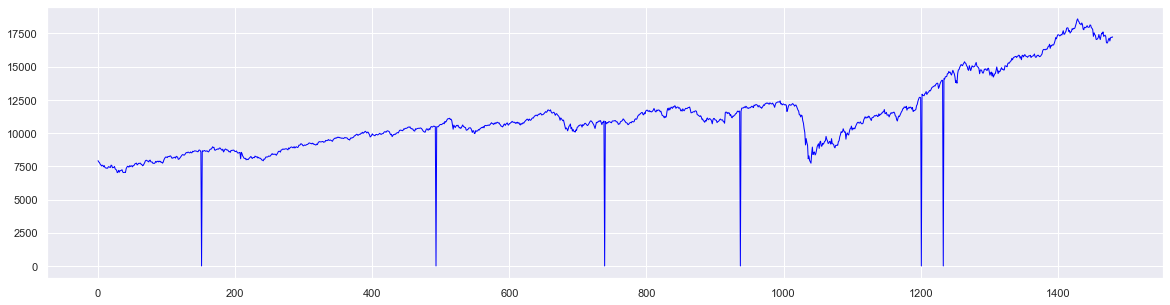

In [26]:
sns.set(rc = {'figure.figsize': (20, 5)})
df['Open'].plot(linewidth = 1,color='blue')

In [27]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

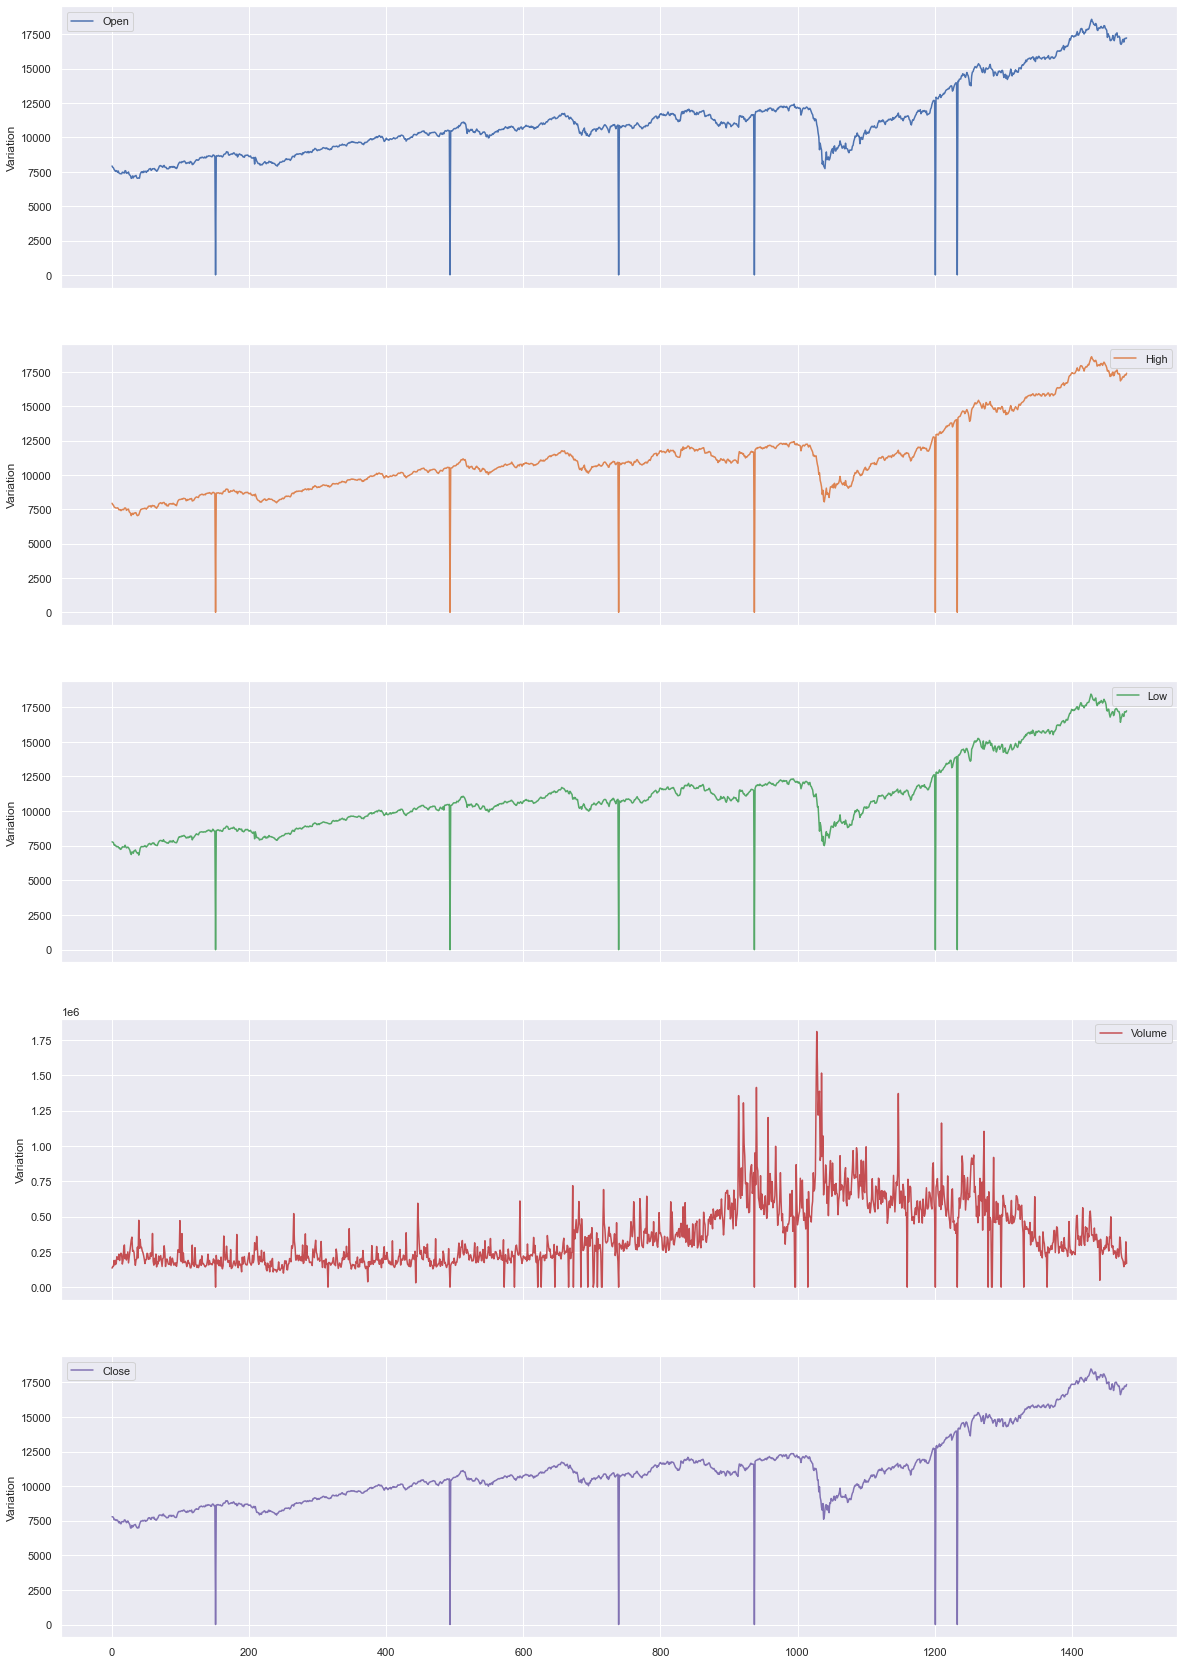

In [29]:
cols_plot = ['Open','High','Low','Volume','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

# Sort the dataset on date time and filter “Date” and “Open” columns


In [30]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-01-04,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
2016-01-05,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2016-01-06,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
2016-01-07,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
2016-01-08,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0
...,...,...,...,...,...,...,...
2021-12-27,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
2021-12-28,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
2021-12-29,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0


In [31]:
del df["Date"]

In [32]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [33]:
df.rolling(7).mean().head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-12,7705.807129,7724.592913,7626.478586,7651.535645,7651.535645,160885.714286
2016-01-13,7653.428571,7675.078683,7575.721401,7618.835659,7618.835659,172385.714286
2016-01-14,7601.857143,7642.735770,7530.085659,7583.428502,7583.428502,180328.571429


<AxesSubplot:xlabel='Date'>

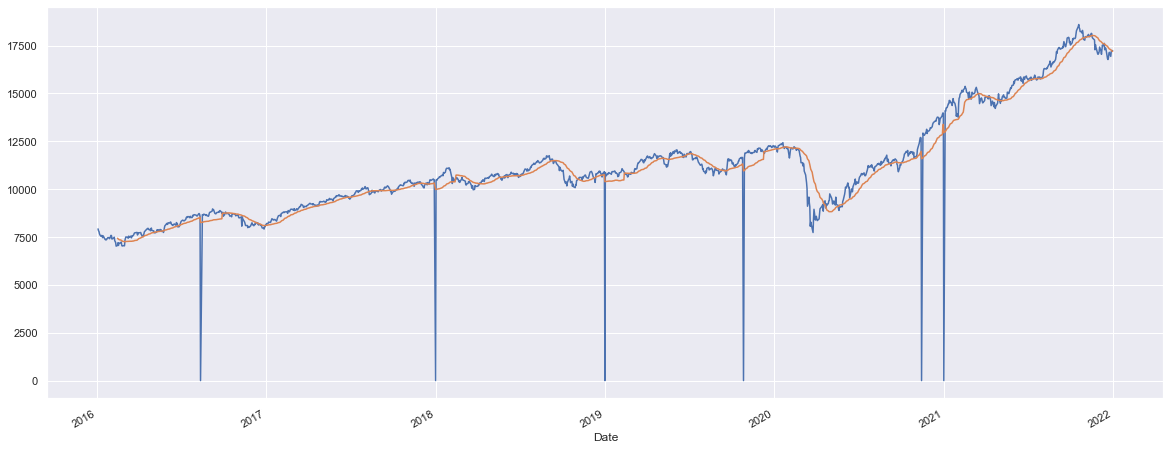

In [34]:
df['Open'].plot(figsize=(20,8),alpha = 1)
df.rolling(window=30).mean()['Close'].plot(alpha = 1)

<AxesSubplot:xlabel='Date'>

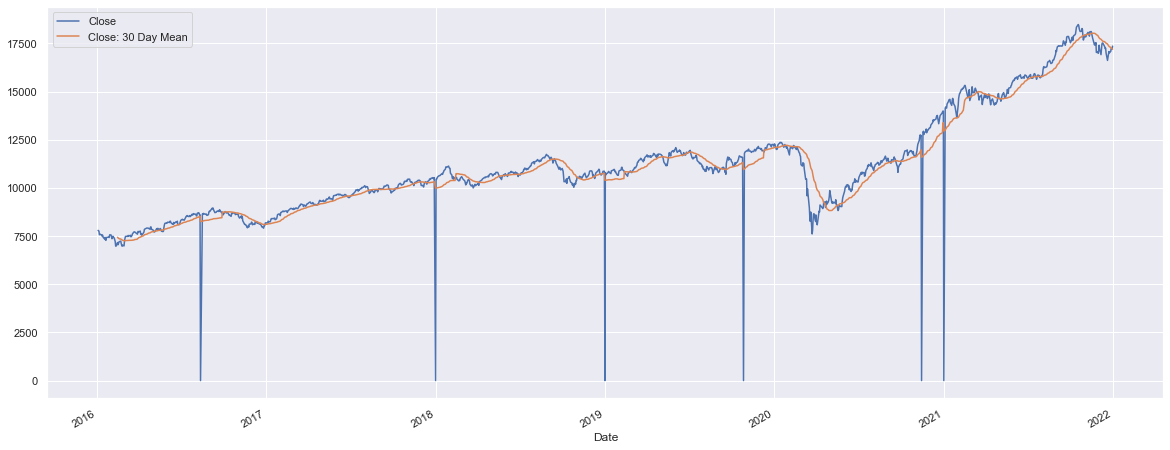

In [35]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(20,8),alpha = 1)

# Optional specify a minimum numbe2of periods

<AxesSubplot:xlabel='Date'>

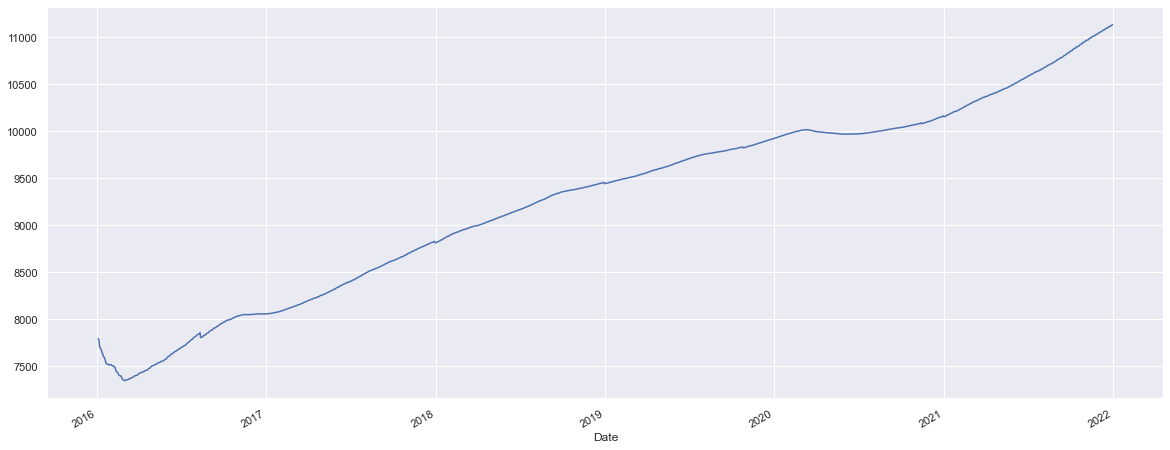

In [36]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(20,8),alpha = 1)

In [39]:
df=df.reset_index()['Open']
df

0        7924.549805
1        7828.399902
2        7788.049805
3        7673.350098
4        7611.649902
            ...     
1476    16937.750000
1477    17177.599609
1478    17220.099609
1479    17201.449219
1480    17244.500000
Name: Open, Length: 1481, dtype: float64

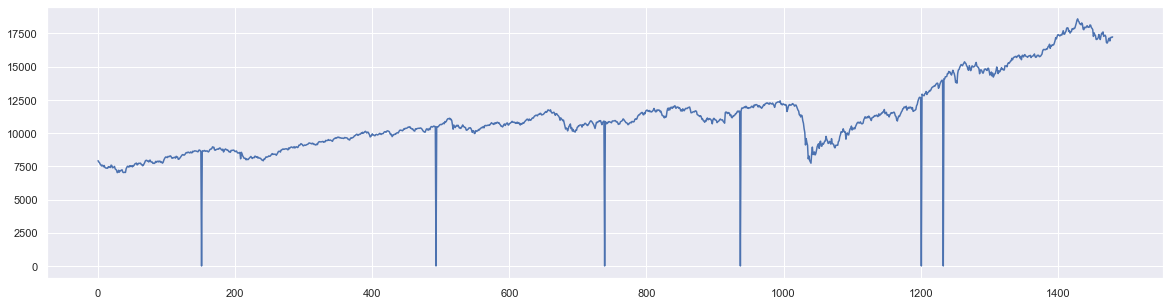

In [41]:
plt.plot(df)

# LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.42599725]
 [0.42082855]
 [0.41865947]
 ...
 [0.92569487]
 [0.92469229]
 [0.92700655]]


# splitting dataset into train and test split

In [43]:
train_size=int(len(df)*0.75)
test_size=len(df)-train_size
train_data,test_data=df[0:train_size,:],df[train_size:len(df),:1]

In [44]:
train_size,test_size

(1110, 371)

In [45]:
train_data,test_data

(array([[0.42599725],
        [0.42082855],
        [0.41865947],
        ...,
        [0.57647823],
        [0.58072501],
        [0.5815744 ]]),
 array([[0.57818233],
        [0.57864194],
        [0.58335908],
        [0.57792966],
        [0.57524991],
        [0.57552946],
        [0.5779915 ],
        [0.5912936 ],
        [0.59810184],
        [0.6037517 ],
        [0.5985803 ],
        [0.59938397],
        [0.6034184 ],
        [0.59960703],
        [0.60620839],
        [0.60499346],
        [0.5988222 ],
        [0.59441684],
        [0.58845526],
        [0.59969575],
        [0.60130577],
        [0.60135685],
        [0.60585089],
        [0.60864623],
        [0.60685882],
        [0.60932354],
        [0.61031537],
        [0.6047032 ],
        [0.60528912],
        [0.61562924],
        [0.60838821],
        [0.61334458],
        [0.61347089],
        [0.61890567],
        [0.61889223],
        [0.62407707],
        [0.62373573],
        [0.63312162],
        [0.616282

# convert an array of values into a dataset matrix

In [46]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return numpy.array(train_X), numpy.array(train_Y)

# reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [47]:
import numpy
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [48]:
print(X_train.shape), print(y_train.shape)

(1009, 100)
(1009,)


(None, None)

# reshape input to be [samples, time steps, features] which is required for LSTM

In [49]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create the Stacked LSTM model

In [52]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=e915897fbcb03df9c0b1e96c05d9b0b08da265ea6b44455d08edf844c5b27af6
  Stored in directory: c:\users\pearl\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [54]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 12s 362ms/step - loss: 0.0684 - val_loss: 0.0838
Epoch 2/100
16/16 [==============================] - 4s 243ms/step - loss: 0.0054 - val_loss: 0.0393
Epoch 3/100
16/16 [==============================] - 3s 218ms/step - loss: 0.0028 - val_loss: 0.0263
Epoch 4/100
16/16 [==============================] - 3s 204ms/step - loss: 0.0023 - val_loss: 0.0253
Epoch 5/100
16/16 [==============================] - 3s 218ms/step - loss: 0.0022 - val_loss: 0.0237
Epoch 6/100
16/16 [==============================] - 3s 205ms/step - loss: 0.0021 - val_loss: 0.0201
Epoch 7/100
16/16 [==============================] - 4s 233ms/step - loss: 0.0021 - val_loss: 0.0146
Epoch 8/100
16/16 [==============================] - 4s 221ms/step - loss: 0.0021 - val_loss: 0.0142
Epoch 9/100
16/16 [==============================] - 3s 211ms/step - loss: 0.0020 - val_loss: 0.0150
Epoch 10/100
16/16 [==============================] - 3s 212ms/step - loss: 0.0019 - val_l

In [57]:
import tensorflow as tf

# Lets Do the prediction and check performance metrics

In [58]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [59]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Calculate RMSE performance metrics

In [60]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10242.551630068949

In [61]:
math.sqrt(mean_squared_error(ytest,test_predict))

15227.50298219482

# shift train predictions for plotting

In [63]:
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting

In [68]:
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# plot baseline and predictions

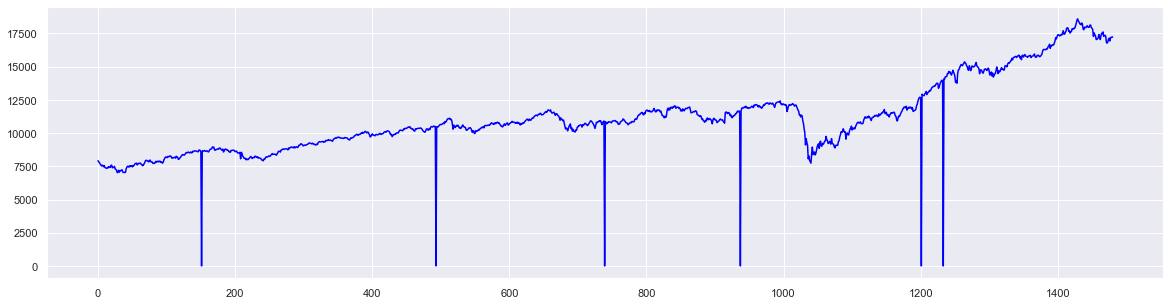

In [69]:
pred  = scaler.inverse_transform(df)
plt.plot(pred,color='blue')
plt.show()

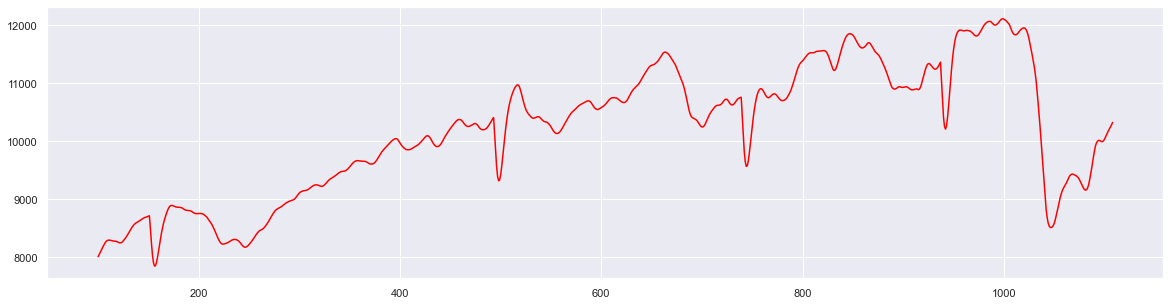

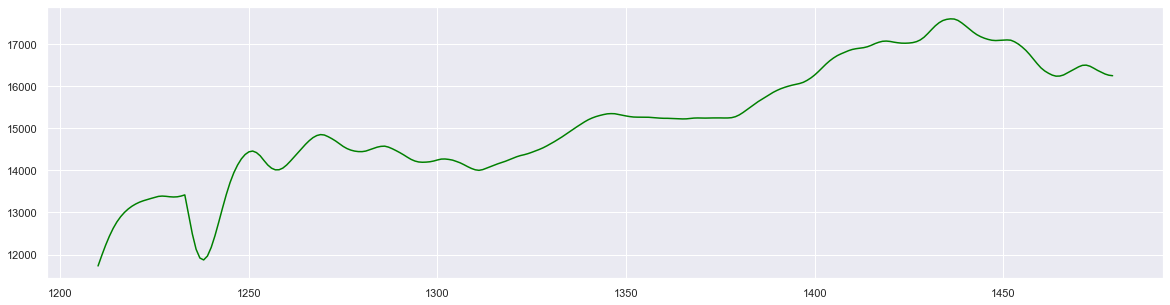

In [70]:
plt.plot(trainPredictPlot,color='red')
plt.show()
plt.plot(testPredictPlot,color='green')
plt.show()

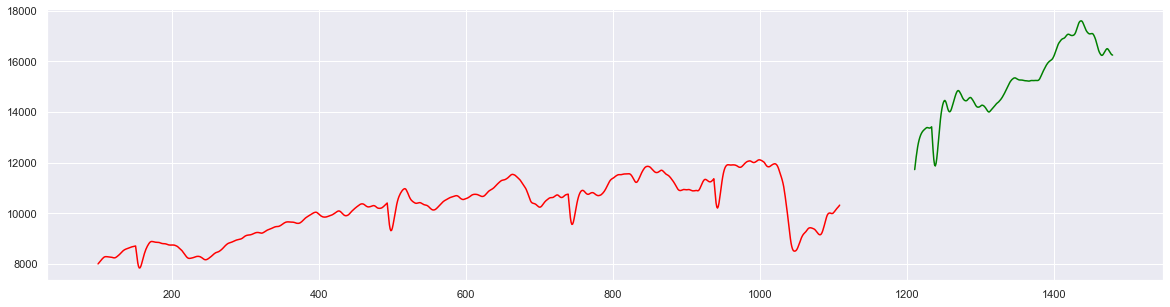

In [71]:
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

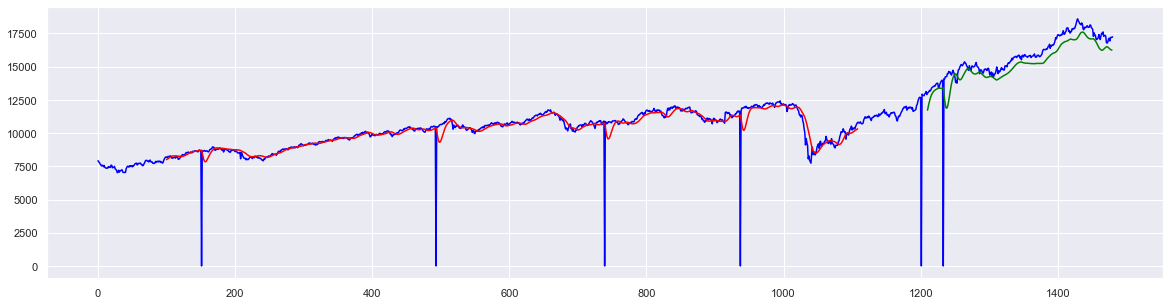

In [72]:
plt.plot(pred,color='blue')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [73]:
len(test_data)

371

In [74]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 30)

## Save the Model

In [75]:
model.save("saved_model.h5")